# 해외 축구선수 이적료 예측

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/FIFA_train.csv')
test_df =  pd.read_csv('./data/FIFA_test.csv')

In [3]:
train_df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


### FIFA_train.csv


|<center>변수명|<center>변수 설명|<center>변수 타입|<center>타입 설명|
|:---:|:---:|:---:|:---:|
|<center>**id**|<center>선수의 고유의 아이디|<center> int|<center>|
|<center>**name**             | <center>이름                                               | <center>string|<center>|
|<center>**age**              | <center>나이                                               | <center>int|<center>15세부터 40세
|<center>**continent**        |<center> 선수들의 국적이 포함되어 있는 대륙                 | <center>string|<center>5개 대륙
|<center>**contract_until**   | <center>선수의 계약기간                                    | <center>object|<center>|
|<center>**position**         | <center>선수가 선호하는 포지션 ex) 공격수, 수비수 등       | <center>object|<center>4개의 범주 구성(GK,DF,MF,ST)
|<center>**prefer_foot**      | <center>선수가 선호하는 발 ex) 오른발                      | <center>object|<center>2개의 범주 구성(왼발,오른발)
|<center>**reputation**       | <center>선수가 유명한 정도 ex) 높은 수치일 수록 유명한 선수|<center>float|<center>1.0부터 5.0까지 구성 - 5단계
|<center>**stat_overall**     | <center>선수의 현재 능력치                                 |<center> int|<center>|
|<center>**stat_potential**   | <center>선수가 경험 및 노력을 통해 발전할 수 있는 정도     |<center> int|<center>|
|<center>**stat_skill_moves** | <center>선수의 개인기 능력치                               |<center>float|<center>1.0부터 5.0까지 구성 - 5단계
|<center>**value**            | <center>FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)  |<center>float|<center>|

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
id                  8932 non-null int64
name                8932 non-null object
age                 8932 non-null int64
continent           8932 non-null object
contract_until      8932 non-null object
position            8932 non-null object
prefer_foot         8932 non-null object
reputation          8932 non-null float64
stat_overall        8932 non-null int64
stat_potential      8932 non-null int64
stat_skill_moves    8932 non-null float64
value               8932 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [5]:
test_df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [6]:
train_df['value'].describe()

count    8.932000e+03
mean     2.778673e+06
std      5.840982e+06
min      1.000000e+04
25%      3.750000e+05
50%      8.250000e+05
75%      2.600000e+06
max      1.105000e+08
Name: value, dtype: float64

## 2. 데이터 탐색(EDA)

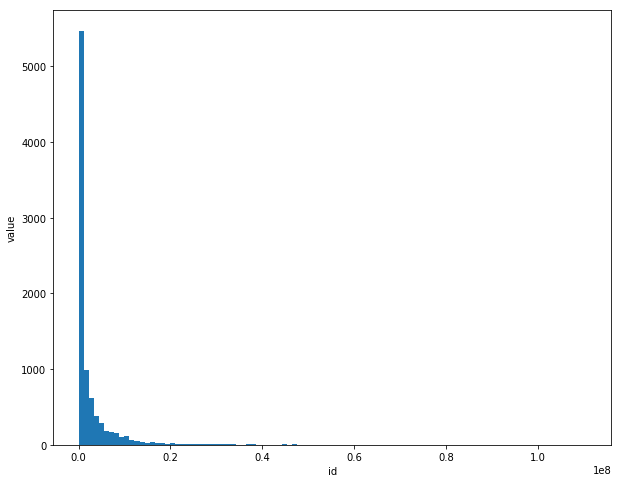

In [7]:
# value 분포 파악
plt.figure(figsize = (10,8))
train_df['value'].plot(kind = "hist",bins = 100)
plt.xlabel("id")
plt.ylabel("value")
plt.show()

#### value가 한쪽에 치우친 모습을 보인다. -> 로그변환 실시

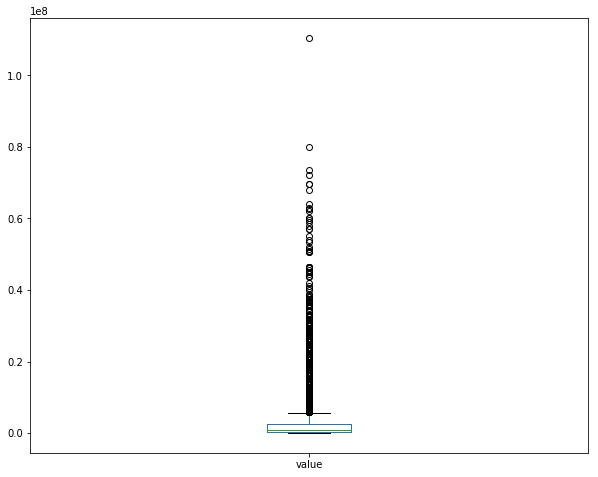

In [8]:
plt.figure(figsize = (10,8))
train_df['value'].plot(kind = 'box')
plt.show()

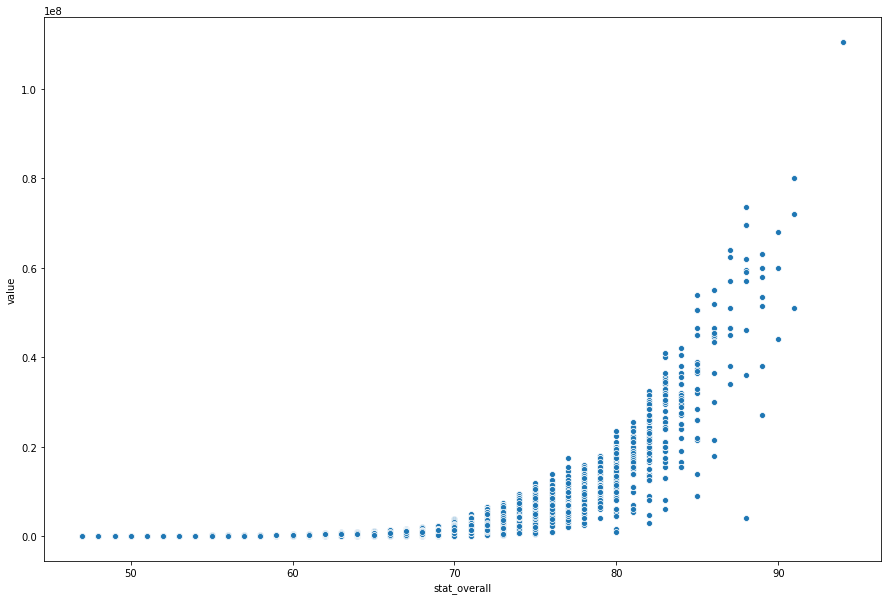

In [9]:
plt.figure(figsize = (15,10))
sns.scatterplot(train_df['stat_overall'], train_df['value'], sizes = (10,10))
plt.show()

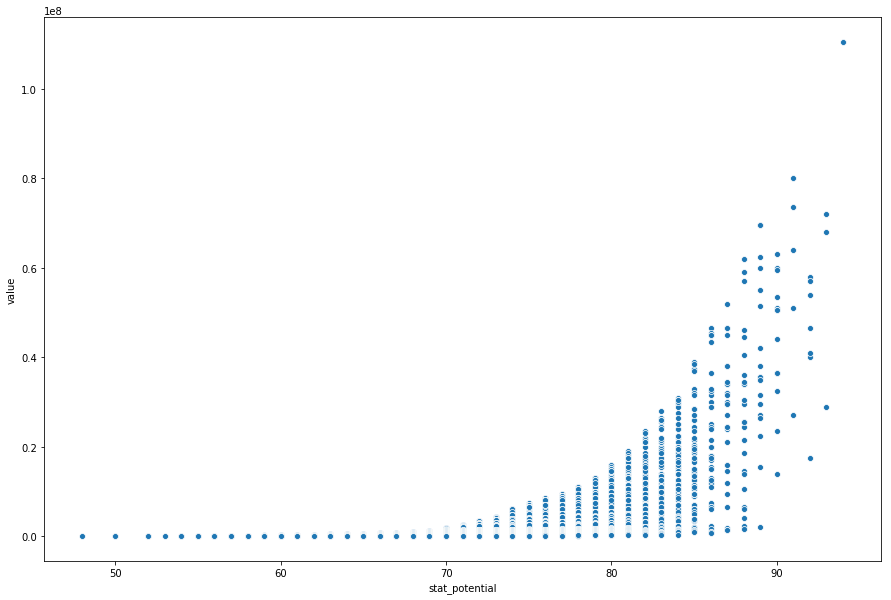

In [10]:
plt.figure(figsize = (15,10))
sns.scatterplot(train_df['stat_potential'], train_df['value'], sizes = (10,10))
plt.show()

#### 당연한 얘기지만 선수의 현재 스탯과 발전가능성이 높을수록 value도 높다.

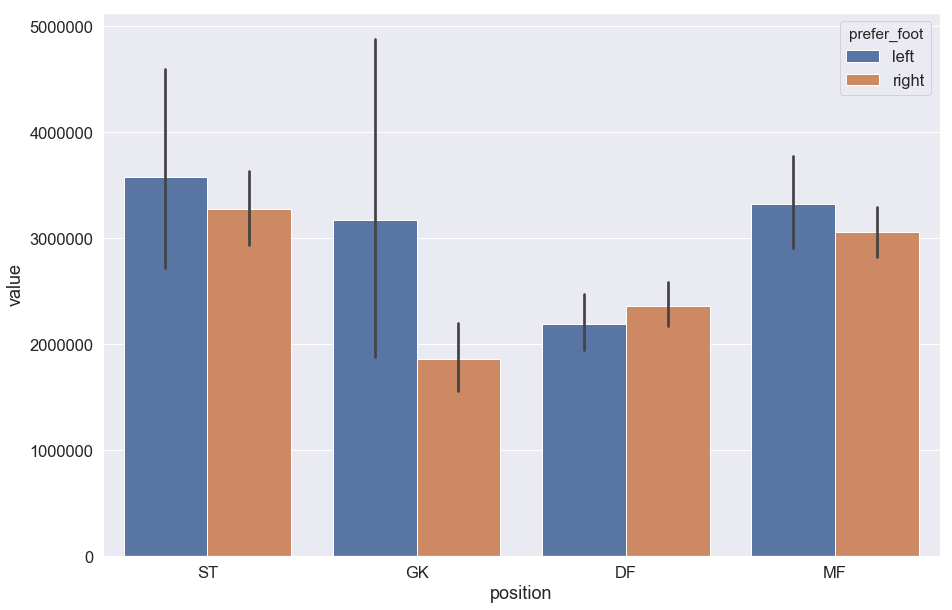

In [11]:
# 포지션 별 왼발 오른발 value 분포
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
sns.barplot(train_df['position'],train_df['value'], hue = train_df['prefer_foot'])

plt.show()

#### 왼발과 오른발에 따른 value분포는 비슷해보이나 골키퍼의 경우 왼발키퍼의 value가 눈에 띄게 높았다.

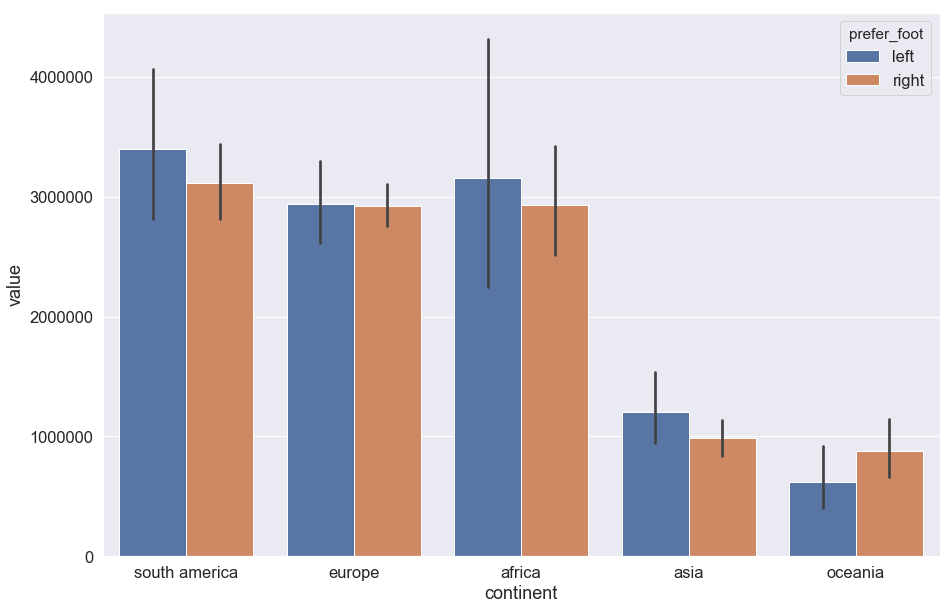

In [12]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
sns.barplot(train_df['continent'],train_df['value'], hue = train_df['prefer_foot'])
plt.show()

### 회귀 분석에 사용할 변수

In [13]:
train_features = train_df[['name','age','continent','position','prefer_foot','reputation','stat_overall','stat_potential','stat_skill_moves','value']]
train_features.head()

,name,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31,south america,ST,left,5.0,94,94,4.0,110500000.0
1,De Gea,27,europe,GK,right,4.0,91,93,1.0,72000000.0
2,L. Suárez,31,south america,ST,right,5.0,91,91,3.0,80000000.0
3,Sergio Ramos,32,europe,DF,right,4.0,91,91,3.0,51000000.0
4,J. Oblak,25,europe,GK,right,3.0,90,93,1.0,68000000.0


In [14]:
train_features.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


<Figure size 720x576 with 0 Axes>

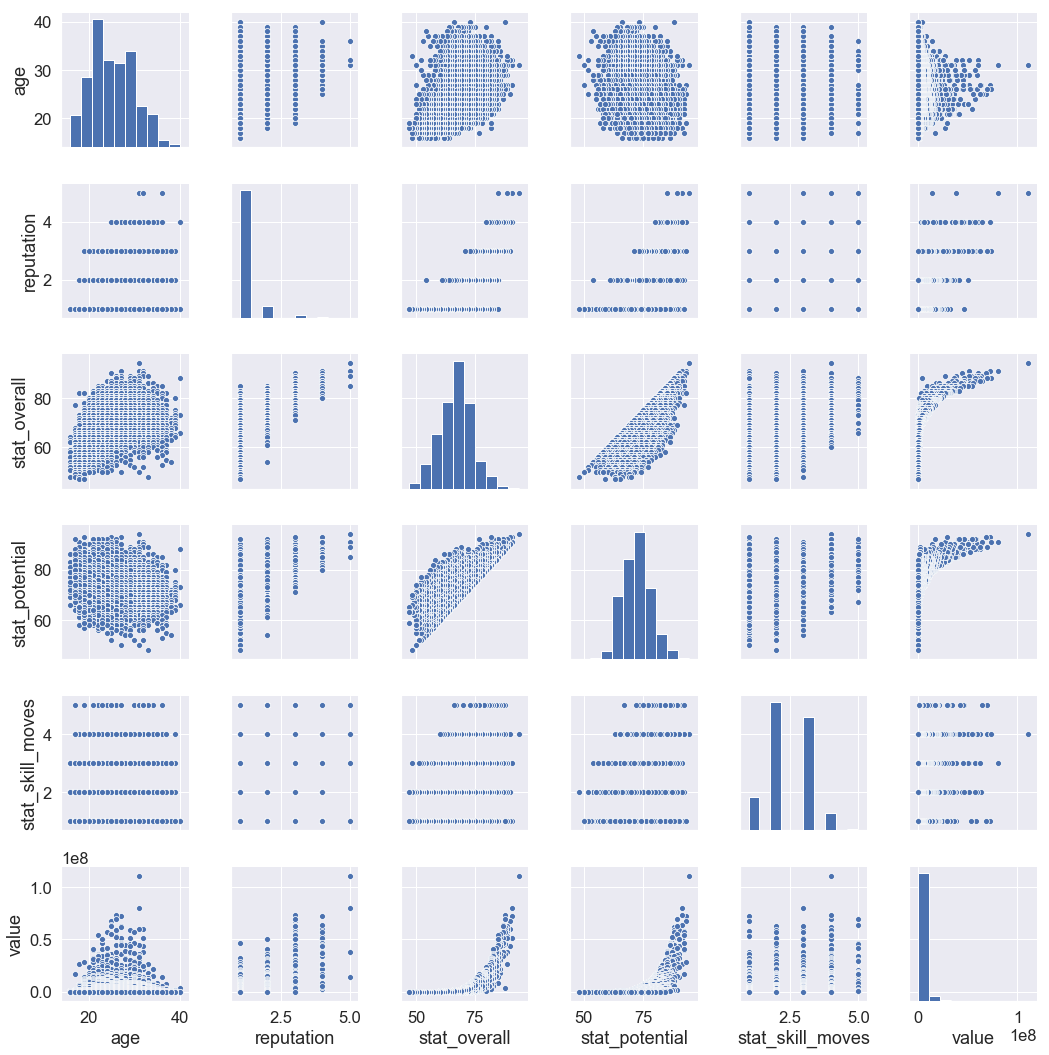

In [15]:
plt.figure(figsize = (10,8))
sns.pairplot(train_features)
plt.show()

In [16]:
train_df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


### 변수 스케일 조정

standard scailing사용

In [17]:
def standard_scaling(df,scale_columns) :
    for col in scale_columns :
        col_mean = df[col].mean()
        col_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - col_mean)/col_std)
    return df

In [18]:
cols = ['age','reputation','stat_overall','stat_potential','stat_skill_moves','value']

train_features = standard_scaling(train_features,cols)

In [19]:
train_features.head()

,name,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,1.249239,south america,ST,left,9.129769,3.925488,3.674392,2.059536,18.442333
1,De Gea,0.386336,europe,GK,right,6.770120,3.487846,3.507395,-1.806206,11.850975
2,L. Suárez,1.249239,south america,ST,right,9.129769,3.487846,3.173402,0.770956,13.220608
3,Sergio Ramos,1.464964,europe,DF,right,6.770120,3.487846,3.173402,0.770956,8.255689
4,J. Oblak,-0.045116,europe,GK,right,4.410472,3.341965,3.507395,-1.806206,11.166159


### 원핫인코딩


In [20]:
# 포지션 더미 변수
position_encoding  = pd.get_dummies(train_features['position'])
train_features = train_features.drop('position',axis = 1)
train_features = train_features.join(position_encoding)

In [21]:
# 주발 더미변수
foot_encoding  = pd.get_dummies(train_features['prefer_foot'])
train_features = train_features.drop('prefer_foot',axis = 1)
train_features = train_features.join(foot_encoding)

In [22]:
train_features.head()

,name,age,continent,reputation,stat_overall,stat_potential,stat_skill_moves,value,DF,GK,MF,ST,left,right
0,L. Messi,1.249239,south america,9.129769,3.925488,3.674392,2.059536,18.442333,0,0,0,1,1,0
1,De Gea,0.386336,europe,6.770120,3.487846,3.507395,-1.806206,11.850975,0,1,0,0,0,1
2,L. Suárez,1.249239,south america,9.129769,3.487846,3.173402,0.770956,13.220608,0,0,0,1,0,1
3,Sergio Ramos,1.464964,europe,6.770120,3.487846,3.173402,0.770956,8.255689,1,0,0,0,0,1
4,J. Oblak,-0.045116,europe,4.410472,3.341965,3.507395,-1.806206,11.166159,0,1,0,0,0,1


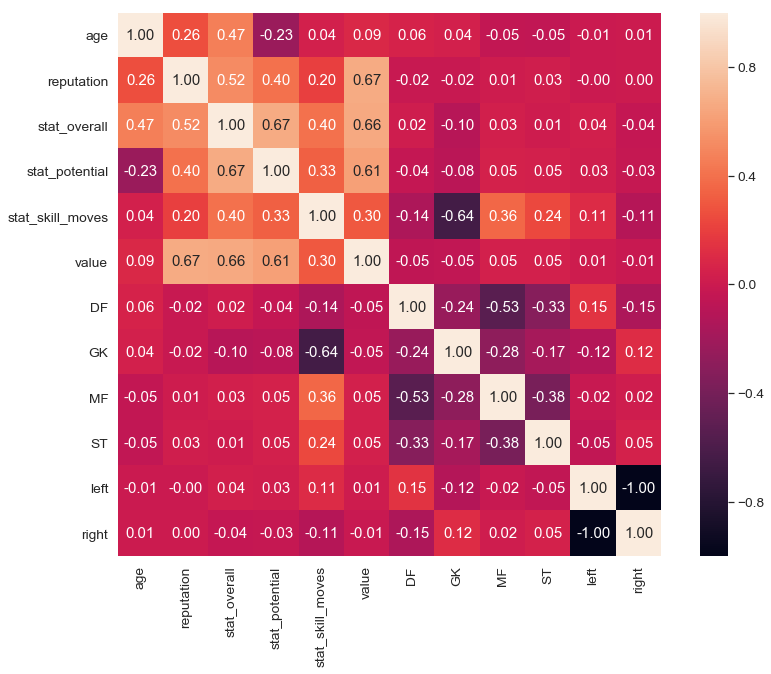

In [23]:
train_corr = train_features.corr()

plt.figure(figsize = (14,10))
sns.set(font_scale = 1.25)
sns.heatmap(train_corr,
           annot = True,
           cbar = True,
           square = True,
           fmt = ".2f")
plt.show()

### 회귀 모델 학습

In [55]:
x = train_features[train_features.columns.difference(['name','value','continent'])]
y = train_features['value']
x

,DF,GK,MF,ST,age,left,reputation,right,stat_overall,stat_potential,stat_skill_moves
0,0,0,0,1,1.249239,1,9.129769,0,3.925488,3.674392,2.059536
1,0,1,0,0,0.386336,0,6.770120,1,3.487846,3.507395,-1.806206
2,0,0,0,1,1.249239,0,9.129769,1,3.487846,3.173402,0.770956
3,1,0,0,0,1.464964,0,6.770120,1,3.487846,3.173402,0.770956
4,0,1,0,0,-0.045116,0,4.410472,1,3.341965,3.507395,-1.806206
5,1,0,0,0,1.464964,0,4.410472,1,3.341965,3.006406,-0.517625
6,0,0,1,0,1.464964,1,6.770120,0,3.341965,3.006406,2.059536
7,0,0,1,0,0.386336,0,4.410472,1,3.196084,3.006406,-0.517625
8,0,1,0,0,0.170610,0,4.410472,1,3.196084,3.340399,-1.806206
9,0,1,0,0,0.170610,1,6.770120,0,3.196084,3.006406,-1.806206


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7145, 11)
(1787, 11)
(7145,)
(1787,)


In [58]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [60]:
# score 계산

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6527275636969279
0.6270296797368027


In [61]:
# r2 스코어 계산
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6270296797368027

In [62]:
# mse 계산
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train_pred,y_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5646709724125679
0.7030412502091851


### statsmodel을 활용한 변수 중요도 계산

In [63]:
import statsmodels.api as sm

# 상수항 추가
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1490.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:35:56   Log-Likelihood:                -6054.7
No. Observations:                7145   AIC:                         1.213e+04
Df Residuals:                    7135   BIC:                         1.220e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0013      0.005      0.244      0.807      -0.009       0.012
DF                  -0.0681      0.011     -6.108      0.000      -0.090      -0.046
GK                   0.0727      0.023      3.116      0.002       0.027       0.119
MF                  -0.0028      0.013     -0.219      0.827      -0.028       0.022
ST                  -0.0006      0.015     -0.040      0.968      -0.031       0.029
age                 -0.3210      0.014    -23.239      0.000      -0.348      -0.294
left                -0.0117      0.010     -1.218      0.223      -0.031       0.007
reputation           0.4368      0.008     53.580      0.000       0.421       0.453
right                0.0130      0.007      1.811      0.070      -0.001       0.027
stat_overall         0.6124      0.018     33.477      0.000       0.577       0.648
stat_potential      -0.0475      0.016     -2.927      0.003      -0.079      -0.016
stat_skill_moves    -0.0034      0.011     -0.306      0.760      -0.025       0.018
==============================================================================
Omnibus:                     6752.855   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           628747.576
Skew:                           4.280   Prob(JB):                         0.00
Kurtosis:                      48.152   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

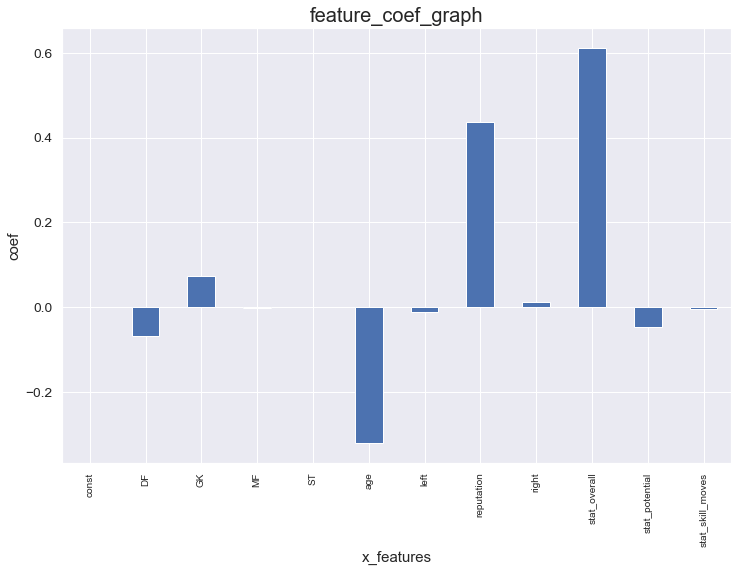

In [64]:
plt.figure(figsize = (12,8))
# 회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합
x_labels = model.params.index.tolist()

# 회귀 계수를 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph', fontsize = 20)
ax.set_xlabel('x_features',fontsize = 15)
ax.set_ylabel('coef',fontsize = 15)
ax.set_xticklabels(x_labels, fontsize = 10)

plt.show()

### 다중공선성 평가

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif['VIF factors'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.round(1)

,VIF factors,features
0,inf,DF
1,inf,GK
2,inf,MF
3,inf,ST
4,4.2,age
5,inf,left
6,1.4,reputation
7,inf,right
8,7.4,stat_overall
9,5.8,stat_potential
